# Assignment 2

Niko Fauter (1047241)

Henning Klatt (1079429)

## 1 Discrete Fourier Transform

### short discrete signal 

In [1]:
include("utils.jl")
using .Utils
using FFTW
using Plots
using Images
using TestImages
using Interact


s= [2,0,3,1]
x=collect(1:length(s))

WebIO._IJuliaInit()

4-element Vector{Int64}:
 1
 2
 3
 4

### discrete Fourier transform

In [2]:
function DFT(x)
    N=length(x)
    S=complex(zeros(N))
    for u in 0:N-1
       
        vec_exp=-2*pi*1im*collect(0:N-1)*u/N
        S[u+1]=1/sqrt(N)*sum(x.*exp.(vec_exp))

    end
    return S
end 

println(DFT(s))
println(fft(s))

ComplexF64[3.0 - 0.0im, -0.5000000000000001 + 0.49999999999999983im, 2.0 + 1.8369701987210297e-16im, -0.4999999999999997 - 0.5000000000000006im]
ComplexF64[6.0 + 0.0im, -1.0 + 1.0im, 4.0 + 0.0im, -1.0 - 1.0im]


### inverse Discrete Fourier Transform

In [3]:
function iDFT(x)
    N=length(x)
    s=complex(zeros(N))
    for k in 0:N-1

        vec_exp=2*pi*1im*collect(0:N-1)*k/N
        s[k+1]=1/sqrt(N)*sum(x.*exp.(vec_exp))
    end
    return s
end 

println(iDFT(DFT(s)))
println(ifft(fft(s)))

ComplexF64[2.0 - 2.7755575615628914e-16im, -2.220446049250313e-16 - 8.326672684688674e-17im, 3.0 + 5.551115123125783e-17im, 1.0000000000000002 + 2.7755575615628914e-16im]
ComplexF64[2.0 + 0.0im, 0.0 + 0.0im, 3.0 + 0.0im, 1.0 + 0.0im]


### Plots

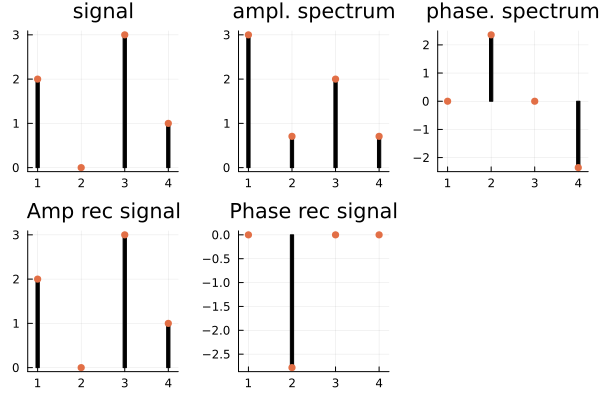

In [4]:
p1 = seriesplot(x, s, title="signal", legend=false)
#savefig("Signal")
p2 = seriesplot(x,abs.(DFT(s)), title="ampl. spectrum", legend=false)
#savefig("Amp-Spek")
p3 = seriesplot(x,angle.(DFT(s)), title="phase. spectrum", legend=false)
#savefig("Angle-Spek")
p4 = seriesplot(x,abs.(iDFT(DFT(s))), title="Amp rec signal", legend=false)
p5 = seriesplot(x,angle.(iDFT(DFT(s))), title="Phase rec signal", legend=false)
plot(p1,p2,p3,p4,p5)